In [1]:
# project: p1
# submitter: tharter
# partner: none
# hours: 3.14

In [2]:
import os, json, string, random, time
from subprocess import check_output, CalledProcessError
from collections import defaultdict as ddict
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
plt.rcParams["font.size"] = 16

## Part 1: Repo Analysis

In [5]:
def checkout(commit):
    check_output(["git", "checkout", commit], cwd="repo")
    
checkout("main")

In [6]:
lines = str(check_output(["git", "log"], cwd="repo"), "utf-8").split("\n")
lines[:10]

['commit 4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4',
 'Author: Steve <steve@example.com>',
 'Date:   Mon Jan 20 15:00:00 2020 -0600',
 '',
 '    only make one pass over list to count all',
 '',
 'commit f637df3f45bc389e1035cc3aadcf5d81a55f0dc4',
 'Author: Steve <steve@example.com>',
 'Date:   Sat Jan 18 18:00:00 2020 -0600',
 '']

In [7]:
#q1
commits = []
authors = []
for l in lines:
    if l.startswith("commit"):
        commits.append(l.split()[1])
    if l.startswith("Author:"):
        authors.append(l.split()[1])
commits = commits[::-1]
authors = authors[::-1]
len(commits)

8

In [8]:
#q2
counts = ddict(int)
for a in authors:
    counts[a] += 1
dict(counts)

{'Ada': 3, 'Linus': 2, 'Steve': 3}

In [9]:
def format_ax(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

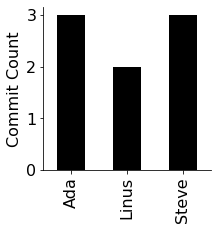

In [10]:
#q3
ax = pd.Series(counts).plot.bar(figsize=(3,3), color="k")
plt.ylabel("Commit Count")
format_ax(ax)

In [11]:
#q4
def line_len():
    with open(os.path.join("repo", "wc.py")) as f:
        return len(list(f))

sizes = []
    
for i, c in enumerate(commits):
    checkout(c)
    sizes.append(line_len())
checkout("main")
sizes

[21, 35, 35, 39, 40, 40, 40, 43]

Text(0, 0.5, 'Lines')

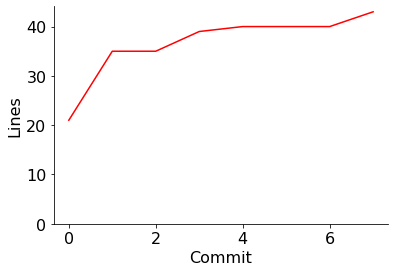

In [12]:
#q5
ax = pd.Series(sizes).plot.line(color="r", ylim=0)
format_ax(ax)
plt.xlabel("Commit")
plt.ylabel("Lines")

## Part 2: Testing

In [13]:
def run_wc(body, commit=None):
    if commit == None:
        commit = "main"

    with open(os.path.join("repo", "test.txt"), "w") as f:
        f.write(body)

    checkout(commit)
    try:
        rv = check_output(["python3", "wc.py", "test.txt", "ALL"], cwd="repo")
        rv = json.loads(str(rv, "utf-8"))
    except CalledProcessError:
        rv = None
    checkout("main")
    return rv

In [14]:
# test inputs to exercise wc.py

# expected result: {'X': 1, 'Y': 1, 'Z': 1}
test1 = """X Y Z"""

# expected result: 
test2 = """A B
A C
"""

# expected result: {'A': 2, 'B': 1, 'C': 1}
test3 = """A B
a c
"""

In [15]:
#q6
run_wc(test1)

{'X': 1, 'Y': 1, 'Z': 1}

In [16]:
#q7
run_wc(test3)

{'A': 2, 'B': 1, 'C': 1}

In [17]:
def test_table(body, expected):
    df = pd.DataFrame({"commit":commits, "author":authors})
    for i, commit in enumerate(commits):
        output = run_wc(body, commit)
        df.loc[i, "pass"] = output == expected
    return df

In [18]:
#q8
test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,True
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [19]:
#q9
test_table(test2, {'A': 2, 'B': 1, 'C': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [20]:
#q10
test_table(test3, {'A': 2, 'B': 1, 'C': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,False
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


## Part 3: Benchmarking

In [21]:
#https://pynative.com/python-generate-random-string/
def rand_str(stringLength=10):
    """Generate a random string of fixed length """
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(stringLength))

def time_run_sec(uniq_words, total_words, word_size=6, commit=None):
    words = [rand_str(word_size) for i in range(uniq_words)]
    words = random.choices(words, k=total_words)
    f = open("test.txt", "w")
    t0 = time.time()
    result = run_wc(" ".join(words), commit=commit)
    t1 = time.time()
    assert result != None
    return t1 - t0

versions = {
    "v0-baseline": "6f5ca9327e986315ffcacddce5d9d6195c0913b7",
    "v1-open-once": "f37e610ce055a3d894baac2d9449e6eb77c72320",
    "v2-pass-per-uniq": "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5",
    "v3-single-pass": "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4",
}

In [22]:
s = {version: time_run_sec(100, 5000, commit=commit) for version, commit in versions.items()}
s = pd.Series(s)
s

v0-baseline         5.609437
v1-open-once        0.804905
v2-pass-per-uniq    0.072635
v3-single-pass      0.057493
dtype: float64

Text(0.5, 0, 'Exec Time (ms)')

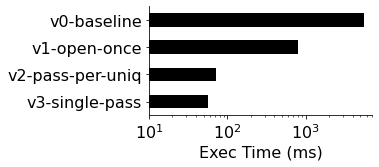

In [23]:
#q11
s = s.sort_index(ascending=False)
ax = (s*1000).plot.barh(logx=True, xlim=10, color="k", figsize=(4,2))
format_ax(ax)
plt.xlabel("Exec Time (ms)")

Text(0.5, 0, 'Exec Time (ms)')

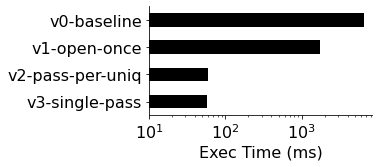

In [24]:
#q12
s = {version: time_run_sec(1, 5000, commit=commit) for version, commit in versions.items()}
s = pd.Series(s)
s = s.sort_index(ascending=False)
ax = (s*1000).plot.barh(logx=True, xlim=10, color="k", figsize=(4,2))
format_ax(ax)
plt.xlabel("Exec Time (ms)")

# Part 4

In [25]:
def scale_df(commit):
    df = pd.DataFrame(index=[1000, 2000, 5000, 10000], columns=[10, 5, 1])
    df.index.name = "total words"
    df.columns.name = "percent uniq"

    for total in df.index:
        for percent in df.columns:
            uniq = total * percent // 100
            print(uniq, total)
            df.loc[total, percent] = time_run_sec(uniq, total, commit=commit)
    return df

v2 = scale_df(versions["v2-pass-per-uniq"])
v3 = scale_df(versions["v3-single-pass"])
v2

100 1000
50 1000
10 1000
200 2000
100 2000
20 2000
500 5000
250 5000
50 5000
1000 10000
500 10000
100 10000
100 1000
50 1000
10 1000
200 2000
100 2000
20 2000
500 5000
250 5000
50 5000
1000 10000
500 10000
100 10000


percent uniq,10,5,1
total words,,,
1000,0.0639539,0.0590861,0.0685151
2000,0.080842,0.0658801,0.0597041
5000,0.133094,0.0981419,0.0674789
10000,0.365342,0.21298,0.0894432


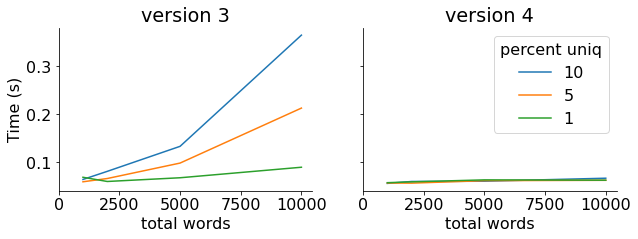

In [26]:
#q13
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 3))
v2.plot.line(ax=axes[0], xlim=0)
v3.plot.line(ax=axes[1], xlim=0)
format_ax(axes[0])
format_ax(axes[1])
axes[0].set_ylabel("Time (s)")
axes[0].set_title("version 3")
axes[1].set_title("version 4")
axes[0].legend().remove()

In [27]:
class Commit:
    def __init__(self, commit_hex, author, message):
        self.commit_hex = commit_hex
        self.author = author
        self.message = message
        
    def __str__(self):
        return f"{self.commit_hex}[{self.author}]: {self.message}"

class Repo:
    def __init__(self):
        self.commits_list = []
        self.commits_dict = {}
        
    def commit(self, commit_hex, author, message):
        c = Commit(commit_hex, author, message)
        self.commits_list.append(c)
        self.commits_dict[commit_hex.lower()] = c
        return c
    
    def __getitem__(self, key):
        if isinstance(key, int):
            return self.commits_list[key]
        return self.commits_dict[key.lower().strip()]

In [28]:
#q14
repo = Repo()
c1 = repo.commit("A39DE2", "Aarushi", "created the repo")
c2 = repo.commit("D1E9C5", "Ben", "wrote some code")
c3 = repo.commit("AA0912", "Emma", "added a readme")
c4 = repo.commit("B143D0", "Hunter", "made some tests")
c5 = repo.commit("F0148D", "Jaime", "fixed a bug")
c6 = repo.commit("B978EE", "Wendy", "optimized the code")
c1.commit_hex, c2.author, c3.message, c4.commit_hex, c5.author, c6.message

('A39DE2', 'Ben', 'added a readme', 'B143D0', 'Jaime', 'optimized the code')

In [29]:
#q15
str(c1), str(repo[1]), str(repo[-1])

('A39DE2[Aarushi]: created the repo',
 'D1E9C5[Ben]: wrote some code',
 'B978EE[Wendy]: optimized the code')

In [30]:
#q16
str(repo["F0148D"]), str(repo["b143d0"]), str(repo["  AA0912  "])

('F0148D[Jaime]: fixed a bug',
 'B143D0[Hunter]: made some tests',
 'AA0912[Emma]: added a readme')